In [1]:
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
from sklearn.decomposition import PCA
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
X = iris.data[:, 2:4]  # we only take the first two features.
#y = [1] * 50 + [0] * 100
y = [0] * 50 + [1] * 50 + [0] * 50

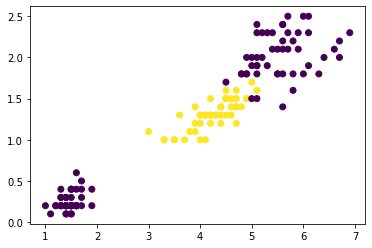

In [5]:
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [6]:
X_reduced = PCA(n_components=2).fit_transform(iris.data)
X_class, y_class = X_reduced[50:], y[50:]

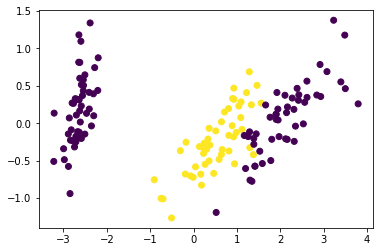

In [7]:
plt.scatter(X_reduced[:,0],X_reduced[:,1], c=y)
plt.show()

In [8]:
import sys

sys.path.append('..')

from flod.classifiers.bsvclassifier import BSVClassifier

In [9]:
q = 1
p = 50

c = 1

print(f'p={1 / (c*len(X_reduced))}')

p=0.006666666666666667


In [10]:
clf = BSVClassifier(n_iter=10, c=c, q=q, penalization=200)
clf.fit(X_class, y_class)

BSVClassifier(c=1, n_iter=10, penalization=200)

In [11]:
y_pred = clf.predict(X_reduced)

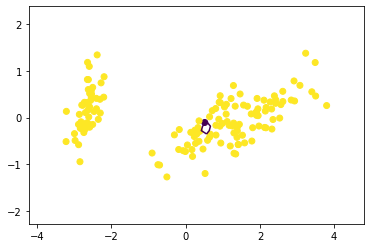

In [12]:
gx = np.linspace(min(X_reduced[:,0])-1, max(X_reduced[:,0])+1, 50)
gy = np.linspace(min(X_reduced[:,1])-1, max(X_reduced[:,1])+1, 50)
gX, gY = np.meshgrid(gx, gy)
zs = np.array([clf._compute_r(np.array([x, y])) for x, y in zip(np.ravel(gX), np.ravel(gY))])
gZ = zs.reshape(gX.shape)
membership_contour = plt.contour(gX, gY, gZ, levels=(clf.radiuses_[clf.sv_i], ))
plt.clabel(membership_contour, inline=1)

plt.scatter(X_reduced[:,0],X_reduced[:,1], c=y_pred)
plt.show()

In [13]:
from joblib import dump, load
dump(clf, 'iris.joblib') 

['iris.joblib']

**Analizzare risultato di questa run in altro notebook**